In [35]:
import json
from collections import Counter, defaultdict
import matplotlib.pyplot as plt


In [36]:
users = json.load(open('data/users.json'))

In [37]:
__import__('pprint').pprint(users)

[{'friends': [1, 2],
  'id': 0,
  'interests': ['hadoop',
                'big data',
                'hbase',
                'java',
                'spark',
                'storm',
                'cassandra'],
  'name': 'Hero'},
 {'friends': [0, 2, 3],
  'id': 1,
  'interests': ['nosql', 'mongodb', 'cassandra', 'hbase', 'postgres'],
  'name': 'Dunn'},
 {'friends': [0, 1, 3],
  'id': 2,
  'interests': ['python',
                'scikit-learn',
                'scipy',
                'numpy',
                'statsmodel',
                'pandas'],
  'name': 'Sue'},
 {'friends': [1, 2, 4],
  'id': 3,
  'interests': ['R', 'python', 'statistics', 'regression', 'probability'],
  'name': 'Chi'},
 {'friends': [3, 5],
  'id': 4,
  'interests': ['machine learning', 'regression', 'decision trees', 'libsvm'],
  'name': 'Thor'},
 {'friends': [4, 6, 7],
  'id': 5,
  'interests': ['python',
                'R',
                'java',
                'c++',
                'haskell',
         

In [38]:
def number_of_friends(user):
    return len(user['friends'])

In [39]:
number_of_friends(users[0])

2

In [40]:
total_connections = sum(number_of_friends(user) for user in users)
assert 24 == total_connections, total_connections

In [41]:
num_users = len(users) # 10
avg_connections = total_connections/num_users 
assert avg_connections == 2.4

In [42]:
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
num_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1], reverse=True)
print(num_friends_by_id)

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


In [43]:
def friends_of_friends(user):
    user_friends = user['friends']
    user_id = user['id']
    return Counter(
        foaf_id for friend_id in user_friends
        for foaf_id in users[friend_id]["friends"] if foaf_id != user_id and foaf_id not in user_friends
    )

In [44]:
print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


In [45]:
def data_scientists_who_like(target_interest):
    return [user["id"] for user in users if target_interest in user["interests"]]
assert [2,3,5] == data_scientists_who_like('python')

In [46]:
user_ids_by_interest= defaultdict(list)
for user in users:
    for interest in user['interests']:
        user_ids_by_interest[interest].append(user['id'])


In [47]:
intersts_by_user_id = {u['id']: u['interests'] for u in users}
__import__('pprint').pprint(intersts_by_user_id)

{0: ['hadoop', 'big data', 'hbase', 'java', 'spark', 'storm', 'cassandra'],
 1: ['nosql', 'mongodb', 'cassandra', 'hbase', 'postgres'],
 2: ['python', 'scikit-learn', 'scipy', 'numpy', 'statsmodel', 'pandas'],
 3: ['R', 'python', 'statistics', 'regression', 'probability'],
 4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
 5: ['python', 'R', 'java', 'c++', 'haskell', 'programming languages'],
 6: ['statistics', 'probability', 'mathematics', 'theory'],
 7: ['machine learning', 'scikit-learn', 'mahout', 'neural networks'],
 8: ['neural networks', 'deep learning', 'big data', 'artificial intelligence'],
 9: ['hadoop', 'java', 'mapreduce', 'big data']}


In [48]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id 
        for interest in intersts_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user['id']
    )

In [49]:
print(most_common_interests_with(users[0]))

Counter({9: 3, 1: 2, 8: 1, 5: 1})


[]

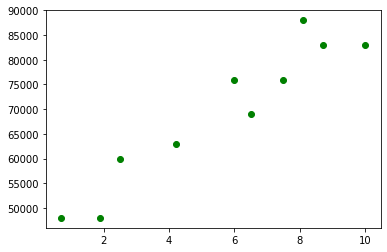

In [55]:
salaries_and_tenures = [
    (83000, 8.7), (88000, 8.1),
    (48000, 0.7), (76000, 6),
    (69000, 6.5), (76000, 7.5),
    (60000, 2.5), (83000, 10),
    (48000, 1.9), (63000, 4.2)
]
salaries = [st[0] for st in salaries_and_tenures]
tenures = [st[1] for st in salaries_and_tenures]
plt.scatter(tenures, salaries, color='green')
plt.plot()

In [57]:
salary_by_tenure = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
average_salary_by_tenure = {
    tenure: sum(salaries)/len(salaries)
            for tenure, salaries in salary_by_tenure.items()
}
print(average_salary_by_tenure)

{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}


In [59]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than 2"
    elif tenure < 5:
        return "less than 5"
    else:
        return "more than 5"

salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

average_salary_by_bucket = {
    tenure_bucket: sum(salaries)/len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [60]:
print(average_salary_by_bucket)

{'more than 5': 79166.66666666667, 'less than 2': 48000.0, 'less than 5': 61500.0}


In [67]:


words_and_counts = Counter(word 
                           for user, interests in intersts_by_user_id.items()
                           for interest in interests
                           for word in interest.lower().split()
                          )

In [70]:
[wc for wc in words_and_counts.most_common() if wc[1] > 1]

[('big', 3),
 ('data', 3),
 ('java', 3),
 ('python', 3),
 ('learning', 3),
 ('hadoop', 2),
 ('hbase', 2),
 ('cassandra', 2),
 ('scikit-learn', 2),
 ('r', 2),
 ('statistics', 2),
 ('regression', 2),
 ('probability', 2),
 ('machine', 2),
 ('neural', 2),
 ('networks', 2)]